In [8]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("student_info.csv")

In [10]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [11]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [14]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [16]:
df.shape

(200, 2)

# discover and visualize the data to gain insights

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [18]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


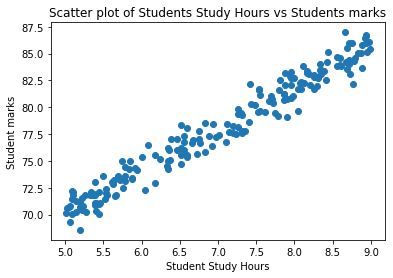

In [21]:
#data visualization
plt.scatter(x=df.study_hours ,y=df.student_marks)
plt.xlabel("Student Study Hours")   #giving name to x
plt.ylabel("Student marks")   #giving name to y
plt.title("Scatter plot of Students Study Hours vs Students marks") #giving name to plot
plt.show()            

# data preperation for ML Algorithms

In [22]:
#Data cleaning
df.isnull()  #true means data is not present and False means data is present

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [23]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [24]:
#There should not be any null value so now impute the vallue in study_hours by taking mean
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [25]:
#impute the mean value 
df2=df.fillna(df.mean())

In [26]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [28]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [29]:
#split dataset

In [40]:
x=df2.drop("student_marks",axis="columns")
y=df2.drop("study_hours",axis="columns")
print("shape of x=",x.shape)
print("shape of y=",y.shape)

shape of x= (200, 1)
shape of y= (200, 1)


In [41]:
#step to train the data using train_test_split dataset using skitlearn librarary
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
print("shape of x=",x_train.shape)
print("shape of y=",y_train.shape)
print("shape of x=",x_test.shape)
print("shape of y=",y_test.shape)

shape of x= (160, 1)
shape of y= (160, 1)
shape of x= (40, 1)
shape of y= (40, 1)


# Select a model and train it

In [42]:
#y=m*x+c
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [43]:
#train model using fit 
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
lr.coef_

array([[3.93571802]])

In [45]:
lr.intercept_

array([50.44735504])

In [47]:
m=3.93
c=50.44
y=m*4+c
y

66.16

In [52]:
lr.predict([[4]])[0][0].round(2)

66.19

In [53]:
#test the data/model
y_pred=lr.predict(x_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [54]:
#to jine actual and predicted value
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns =["students hours","students_marks_original","students_marks_predicted"])


,students hours,students_marks_original,students_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


# Fine-tune your model in percentage

In [55]:
lr.score(x_test,y_test)

0.9514124242154464

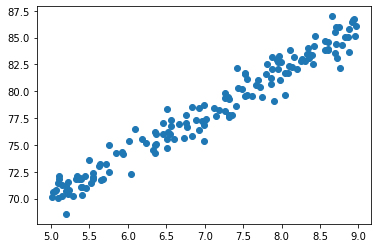

In [57]:
plt.scatter(x_train,y_train)

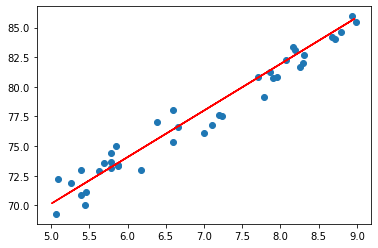

In [58]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color="r")

# Present the Solution 

# Save ML model

In [59]:
import joblib 
joblib.dump(lr,"student_mark_predictor_model.pkl")

['student_mark_predictor_model.pkl']

In [61]:
model=joblib.load("student_mark_predictor_model.pkl")#impute model

In [68]:
model.predict([[5]])[0][0].round(2)

70.13

In [69]:
#to check what parameter are there in pkl file
model.

SyntaxError: invalid syntax (Temp/ipykernel_11404/2386196815.py, line 2)

# Launch,monitor and maintain your system